In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [21]:
df = pd.read_csv('EW-MAX.csv')

In [22]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')


In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.set_index('Date', inplace=True)

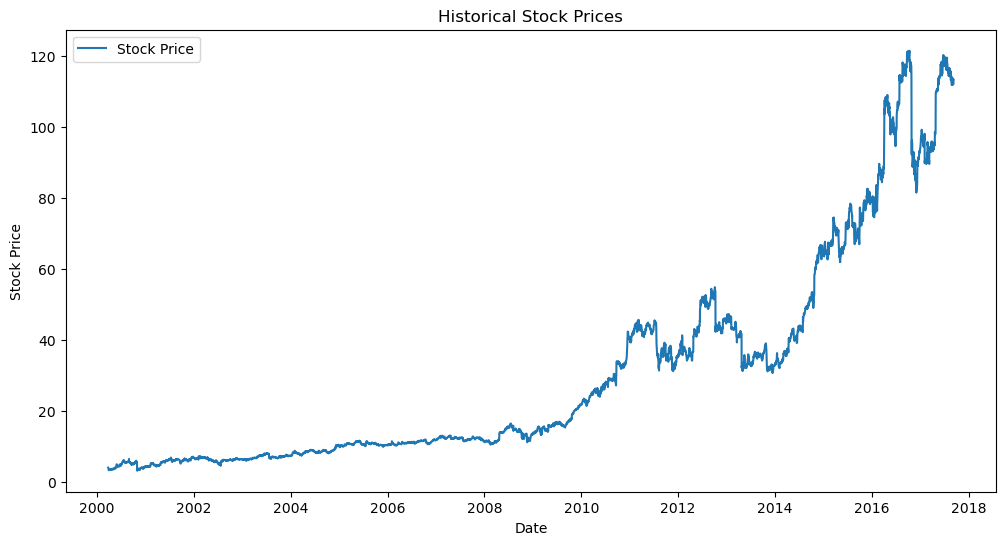

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [27]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [28]:
X_train, y_train = train.drop('Close', axis=1), train['Close']
X_test, y_test = test.drop('Close', axis=1), test['Close']

In [30]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
predictions = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 28.142503225426655


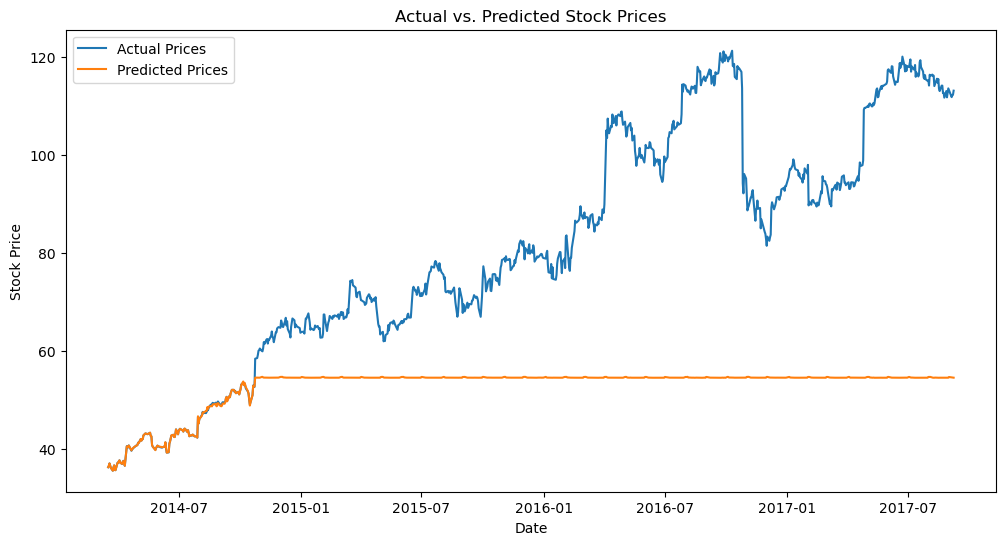

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Prices')
plt.plot(test.index, predictions, label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()